In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [2]:
data=pd.read_csv('Data/electronics.csv')

/Users/shubham/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data=data.sample(50000).reset_index()

In [4]:
df = data.dropna()

In [5]:
df['sentiments'] = df.overall.apply(lambda x: 0 if x in [1, 2, 3] else 1)

<ipython-input-5-3f883b47df69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiments'] = df.overall.apply(lambda x: 0 if x in [1, 2, 3] else 1)


In [6]:
df

,index,overall,vote,verified,reviewTime,reviewText,summary,sentiments
0,2568423,5,0,True,2017-07-29,Good packaging and worked very well.,Five Stars,1
1,2171368,3,0,True,2016-02-02,Not the length advertised,1454371200,0
2,970415,5,0,True,2012-02-07,Quality point-and-shoot,1328572800,1
3,1487831,5,0,True,2013-08-06,Pretty handy to have on hand.,1375747200,1
4,1722585,2,0,True,2012-06-16,"I'll be honest, the reason I bought these was ...",Cool looks and that's about it,0
...,...,...,...,...,...,...,...,...
49995,1319965,4,0,True,2014-10-28,Always worked great & gets rid of the buzz tha...,1414454400,1
49996,1163605,4,0,True,2013-09-20,darn good,1379635200,1
49997,1159497,5,0,True,2016-12-24,Light and Ergonomic Mouse,1482537600,1
49998,2749509,1,0,True,2013-06-05,I liked it for about two years then it quit wo...,Quit working,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49983 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       49983 non-null  int64 
 1   overall     49983 non-null  int64 
 2   vote        49983 non-null  int64 
 3   verified    49983 non-null  bool  
 4   reviewTime  49983 non-null  object
 5   reviewText  49983 non-null  object
 6   summary     49983 non-null  object
 7   sentiments  49983 non-null  int64 
dtypes: bool(1), int64(4), object(3)
memory usage: 3.1+ MB


In [25]:
rating_cnt = df.overall.value_counts()
vote_cnt = df.vote.value_counts()

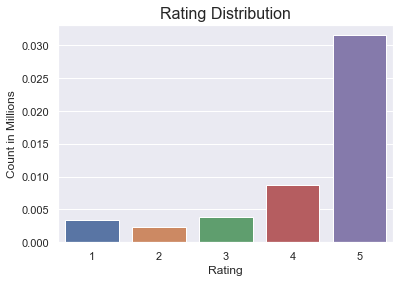

In [28]:
sns.barplot(x=rating_cnt.index, y=rating_cnt/1_000_000)
plt.title('Rating Distribution', fontsize=16)
plt.ylabel('Count in Millions')
plt.xlabel('Rating')
plt.show()

In [29]:
is_voted_value = np.array([vote_cnt[0], vote_cnt[1:].sum()])
is_vote_label = ['Not Voted', 'Voted']

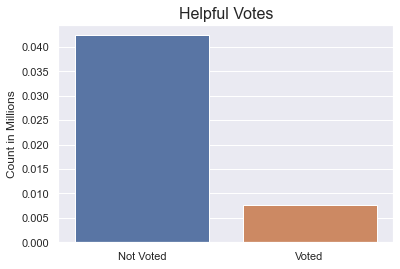

In [44]:
sns.barplot(x=is_vote_label, y=is_voted_value/1_000_000)
plt.title('Helpful Votes', fontsize=16)
plt.ylabel('Count in Millions')
plt.show()

In [7]:
X = df['reviewText']
y = df['sentiments']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size = 0.3, random_state=24)

# Using CountVectorizer

## LogisticRegression

In [20]:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
#Vectorizing the text data
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)
from sklearn.linear_model import LogisticRegression
#Training the model
lr = LogisticRegression()
lr.fit(ctmTr, y_train)
lr_score = lr.score(X_test_dtm, y_test)
#Accuracy score
print("Results for Logistic Regression with CountVectorizer")
print(lr_score)
#Predicting the labels for test data
y_pred_lr = lr.predict(X_test_dtm)
from sklearn.metrics import confusion_matrix
#Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
print(tn, fp, fn, tp)
#True positive and true negative rates
tpr_lr = round(tp/(tp + fn), 4)
tnr_lr = round(tn/(tn+fp), 4)
print(tpr_lr, tnr_lr)
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_lr)

Results for Logistic Regression with CountVectorizer
0.8783594531510504
1633 1260 564 11538
0.9534 0.5645


/Users/shubham/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9267469879518072

## SVM

In [10]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                         test_size = 0.3, random_state=123)
#Vectorizing the text data
cv = CountVectorizer()
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)
from sklearn import svm
#Training the model
svcl = svm.SVC()
svcl.fit(ctmTr, y_train)
svcl_score = svcl.score(X_test_dtm, y_test)
print("Results for Support Vector Machine with CountVectorizer")
print(svcl_score)
y_pred_sv = svcl.predict(X_test_dtm)
#Confusion matrix
cm_sv = confusion_matrix(y_test, y_pred_sv)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_sv).ravel()
print(tn, fp, fn, tp)
tpr_sv = round(tp/(tp + fn), 4)
tnr_sv = round(tn/(tn+fp), 4)
print(tpr_sv, tnr_sv)

Results for Support Vector Machine with CountVectorizer
0.858486162054018
1049 1844 278 11824
0.977 0.3626


In [11]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_sv)

0.9176561893674815

## KNN

In [14]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                         test_size = 0.3, random_state=65)
cv = CountVectorizer()
X_train_vec = cv.fit_transform(X_train)
X_test_vec = cv.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vec, y_train)
knn_score = knn.score(X_test_vec, y_test)
print("Results for KNN Classifier with CountVectorizer")
print(knn_score)
y_pred_knn = knn.predict(X_test_vec)
#Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
print(tn, fp, fn, tp)
tpr_knn = round(tp/(tp + fn), 4)
tnr_knn = round(tn/(tn+fp), 4)
print(tpr_knn, tnr_knn)

Results for KNN Classifier with CountVectorizer
0.8426142047349117
937 1956 404 11698
0.9666 0.3239


In [15]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_knn)

0.9083708650411554

## Random Forest

In [17]:
cv = CountVectorizer()
X_train_vec = cv.fit_transform(X_train)
X_test_vec = cv.transform(X_test)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)
rf_score = rf.score(X_test_vec, y_test)
print("Results for Random Forest Classifier with CountVectorizer")
print(rf_score)
y_pred_rf = rf.predict(X_test_vec)
#Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
print(tn, fp, fn, tp)
tpr_rf = round(tp/(tp + fn), 4)
tnr_rf = round(tn/(tn+fp), 4)
print(tpr_rf, tnr_rf)

Results for Random Forest Classifier with CountVectorizer
0.8668889629876626
1163 1730 266 11836
0.978 0.402


In [18]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_rf)

0.9222378058282685

# TFIDF Vectorizer

## Logistic Regression

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)
lr_score = lr.score(X_test_vec, y_test)
#Accuracy score
print("Results for Logistic Regression with CountVectorizer")
print(lr_score)
#Predicting the labels for test data
y_pred_lr = lr.predict(X_test_vec)
from sklearn.metrics import confusion_matrix
#Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
print(tn, fp, fn, tp)
#True positive and true negative rates
tpr_lr = round(tp/(tp + fn), 4)
tnr_lr = round(tn/(tn+fp), 4)
print(tpr_lr, tnr_lr)
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_lr)

Results for Logistic Regression with CountVectorizer
0.8814938312770924
1499 1394 383 11719
0.9684 0.5181


0.9295260757485624

## SVM

In [21]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
#Training the model
svcl = svm.SVC()
svcl.fit(X_train_vec, y_train)
svcl_score = svcl.score(X_test_vec, y_test)
print("Results for Support Vector Machine with CountVectorizer")
print(svcl_score)
y_pred_sv = svcl.predict(X_test_vec)
#Confusion matrix
cm_sv = confusion_matrix(y_test, y_pred_sv)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_sv).ravel()
print(tn, fp, fn, tp)
tpr_sv = round(tp/(tp + fn), 4)
tnr_sv = round(tn/(tn+fp), 4)
print(tpr_sv, tnr_sv)
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_sv)

Results for Support Vector Machine with CountVectorizer
0.8902967655885295
1551 1342 303 11799
0.975 0.5361


0.9348334191657093

## KNN

In [22]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vec, y_train)
knn_score = knn.score(X_test_vec, y_test)
print("Results for KNN Classifier with CountVectorizer")
print(knn_score)
y_pred_knn = knn.predict(X_test_vec)
#Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
print(tn, fp, fn, tp)
tpr_knn = round(tp/(tp + fn), 4)
tnr_knn = round(tn/(tn+fp), 4)
print(tpr_knn, tnr_knn)
f1_score(y_test, y_pred_knn)

Results for KNN Classifier with CountVectorizer
0.8385461820606869
552 2341 80 12022
0.9934 0.1908


0.9085206877007369

## Random Forest

In [47]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)
rf_score = rf.score(X_test_vec, y_test)
print("Results for Random Forest Classifier with CountVectorizer")
print(rf_score)
y_pred_rf = rf.predict(X_test_vec)
#Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
print(tn, fp, fn, tp)
tpr_rf = round(tp/(tp + fn), 4)
tnr_rf = round(tn/(tn+fp), 4)
print(tpr_rf, tnr_rf)
f1_score(y_test, y_pred_rf)

Results for Random Forest Classifier with CountVectorizer
0.8692897632544181
1114 1779 181 11921
0.985 0.3851


0.9240368963646229